# Iris Flower Classification

**Context**

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

**Content**

The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

**Task**

The Iris flower dataset consists of three species: setosa, versicolor, and virginica. 
These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iri flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements.

1. **Import necessary libraries**

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

2. **Load the Dataset**

- pd.read_csv(file_path):- loads the Iris dataset from the CSV file.
- iris_df.head():- displays the first few rows of the dataset.

In [16]:
file_path = '/Users/rishikasingh/Downloads/IRIS.csv'
iris_df = pd.read_csv(file_path)

3. **Exploring the Dataset**

- iris_df.describe():- provides summary statistics for each feature.
- iris_df.isnull().sum():- checks for any missing values in the dataset.

In [17]:
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


4. **Summary statistics**

In [18]:
print(iris_df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


5. **Check for missing values**

In [19]:
print(iris_df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


**Preprocess** **the** **Data**

- LabelEncoder():- is used to encode the species labels from categorical to numerical values.
The dataset is split into features (X) and target variable (y).


6. **Encode the species labels**

In [20]:
label_encoder = LabelEncoder()
iris_df['species'] = label_encoder.fit_transform(iris_df['species'])

7. **Split the dataset into features and target variable**

- train_test_split() splits the data into training and testing sets (80% train, 20% test).

In [21]:
X = iris_df.drop(columns='species')
y = iris_df['species']

8. **Split the Data**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the Model 

9. **Initialize the Random Forest classifier**

In [23]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

10. **Train the model**

RandomForestClassifier() initializes the Random Forest classifier with 100 trees.

rf_classifier.fit(X_train, y_train):- trains the model on the training data.

In [24]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- **Evaluate the Model**

rf_classifier.predict(X_test):-  makes predictions on the testing data.

accuracy_score() and classification_report() are used to evaluate the model's performance.


11. **Make predictions on the testing set**

In [25]:
y_pred = rf_classifier.predict(X_test)

12. **Evaluate the model**

In [26]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



- # Visualisations

sns.pairplot():- creates pair plots to visualize the relationships between features.

A bar plot shows the feature importances in the Random Forest model.

A heatmap of the confusion matrix visualizes the performance of the model in terms of correctly and incorrectly classified samples.


1. **Pairplot of the dataset**

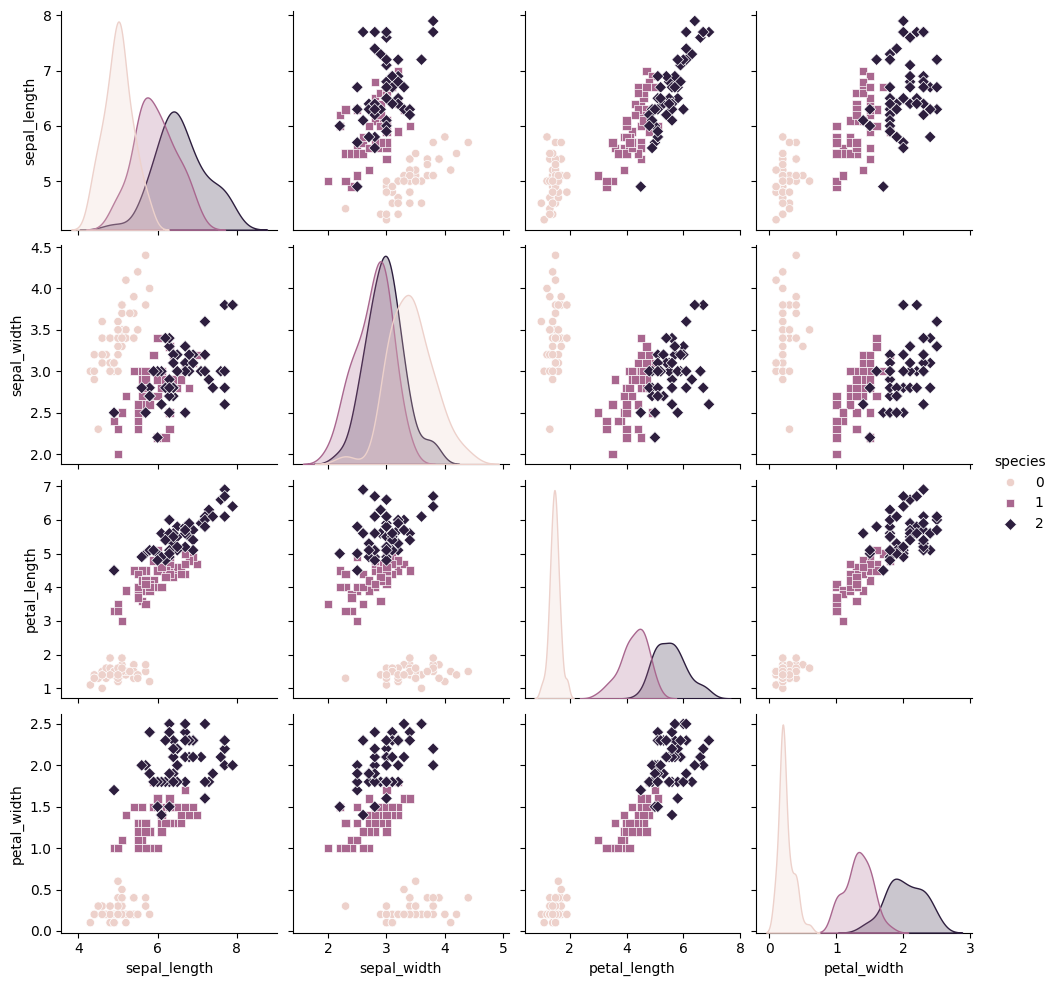

In [27]:
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.show()

2. **Feature importance visualization**

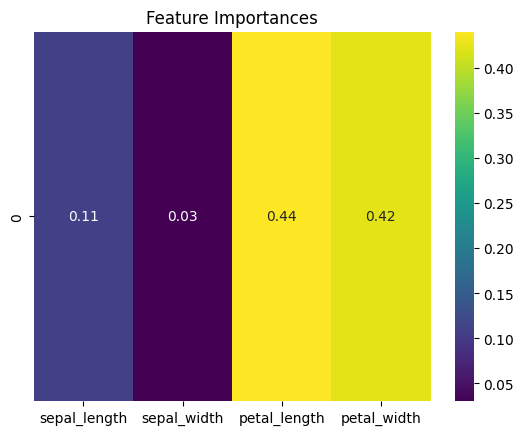

In [28]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
sns.heatmap(feature_importances.to_frame().T, annot=True, cmap='viridis')
plt.title('Feature Importances')
plt.show()